In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset_dir = '../../dataset/split_data/'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [3]:
image_width = 200
image_height = 200

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical')

Found 17443 images belonging to 6 classes.
Found 2177 images belonging to 6 classes.
Found 2186 images belonging to 6 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    break

In [6]:
labels_list = train_generator.class_indices
labels_list

{'battery': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [7]:
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'battery', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

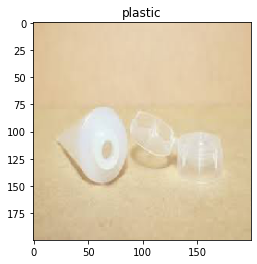

In [8]:
image = data_batch[0]

plt.imshow(image)
plt.title(labels_list[np.argmax(labels_batch[0])])
plt.show()

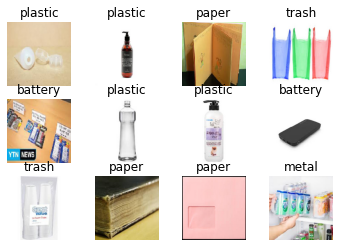

In [9]:
rows = 3
columns = 4

for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break
    
    plt.subplot(rows, columns, num+1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(image_width, image_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))   

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    

In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=17443 / 32,
                              epochs=200,
                              validation_data=validation_generator,
                              validation_steps=2177 / 32)

C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
545/545 [==============================] - 328s 601ms/step - loss: 2.8845 - accuracy: 0.3332 - val_loss: 1.5196 - val_accuracy: 0.4107
Epoch 2/200
545/545 [==============================] - 309s 567ms/step - loss: 1.4034 - accuracy: 0.4530 - val_loss: 1.4439 - val_accuracy: 0.4401
Epoch 3/200
545/545 [==============================] - 307s 563ms/step - loss: 1.2249 - accuracy: 0.5338 - val_loss: 1.2638 - val_accuracy: 0.5122
Epoch 4/200
545/545 [==============================] - 306s 562ms/step - loss: 1.0214 - accuracy: 0.6124 - val_loss: 1.2119 - val_accuracy: 0.5402
Epoch 5/200
545/545 [==============================] - 306s 561ms/step - loss: 0.8691 - accuracy: 0.6821 - val_loss: 1.4106 - val_accuracy: 0.5007
Epoch 6/200
545/545 [==============================] - 306s 561ms/step - loss: 0.7318 - accuracy: 0.7344 - val_loss: 1.2859 - val_accuracy: 0.5554
Epoch 7/200
545/545 [==============================] - 306s 561ms/step - loss: 0.5922 - accuracy: 0.7874 - val_loss: 1

545/545 [==============================] - 306s 562ms/step - loss: 0.2893 - accuracy: 0.9395 - val_loss: 6.1038 - val_accuracy: 0.5416
Epoch 57/200
545/545 [==============================] - 306s 562ms/step - loss: 0.3364 - accuracy: 0.9386 - val_loss: 7.1478 - val_accuracy: 0.5452
Epoch 58/200
545/545 [==============================] - 306s 562ms/step - loss: 0.3360 - accuracy: 0.9421 - val_loss: 6.9146 - val_accuracy: 0.5733
Epoch 59/200
545/545 [==============================] - 306s 562ms/step - loss: 0.2858 - accuracy: 0.9443 - val_loss: 8.2308 - val_accuracy: 0.5411
Epoch 60/200
545/545 [==============================] - 306s 562ms/step - loss: 0.3346 - accuracy: 0.9369 - val_loss: 9.4131 - val_accuracy: 0.5425
Epoch 61/200
545/545 [==============================] - 307s 562ms/step - loss: 0.3723 - accuracy: 0.9314 - val_loss: 7.0867 - val_accuracy: 0.5425
Epoch 62/200
545/545 [==============================] - 306s 562ms/step - loss: 0.3112 - accuracy: 0.9430 - val_loss: 5.8756 

545/545 [==============================] - 306s 561ms/step - loss: 0.4170 - accuracy: 0.9304 - val_loss: 3.2505 - val_accuracy: 0.4681
Epoch 112/200
545/545 [==============================] - 307s 564ms/step - loss: 0.4273 - accuracy: 0.9162 - val_loss: 9.1912 - val_accuracy: 0.5407
Epoch 113/200
545/545 [==============================] - 307s 563ms/step - loss: 0.4079 - accuracy: 0.9323 - val_loss: 9.4595 - val_accuracy: 0.5682
Epoch 114/200
545/545 [==============================] - 306s 562ms/step - loss: 0.3570 - accuracy: 0.9308 - val_loss: 3.5206 - val_accuracy: 0.5181
Epoch 115/200
545/545 [==============================] - 306s 562ms/step - loss: 0.4300 - accuracy: 0.9164 - val_loss: 6.5079 - val_accuracy: 0.4892
Epoch 116/200
545/545 [==============================] - 306s 561ms/step - loss: 0.4094 - accuracy: 0.9251 - val_loss: 11.2051 - val_accuracy: 0.5420
Epoch 117/200
545/545 [==============================] - 306s 561ms/step - loss: 0.3869 - accuracy: 0.9240 - val_loss: 

545/545 [==============================] - 304s 557ms/step - loss: 0.4249 - accuracy: 0.9166 - val_loss: 10.9831 - val_accuracy: 0.5338
Epoch 167/200
545/545 [==============================] - 304s 558ms/step - loss: 0.4773 - accuracy: 0.9145 - val_loss: 14.7485 - val_accuracy: 0.5494
Epoch 168/200
545/545 [==============================] - 304s 557ms/step - loss: 0.4638 - accuracy: 0.9166 - val_loss: 7.1760 - val_accuracy: 0.5402
Epoch 169/200
545/545 [==============================] - 304s 558ms/step - loss: 0.4185 - accuracy: 0.9189 - val_loss: 8.5628 - val_accuracy: 0.5402
Epoch 170/200
545/545 [==============================] - 304s 558ms/step - loss: 0.5659 - accuracy: 0.9032 - val_loss: 8.3804 - val_accuracy: 0.5572
Epoch 171/200
545/545 [==============================] - 304s 557ms/step - loss: 0.5054 - accuracy: 0.9185 - val_loss: 8.4462 - val_accuracy: 0.5788
Epoch 172/200
545/545 [==============================] - 304s 558ms/step - loss: 0.5540 - accuracy: 0.9163 - val_loss:

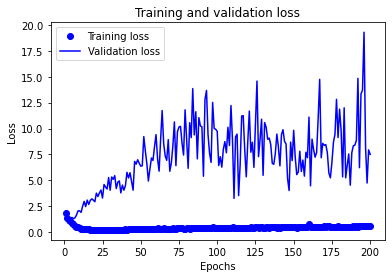

In [13]:
loss = history.history['loss']         
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

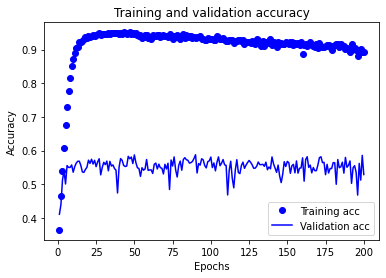

In [14]:
acc = history.history['accuracy']           
val_acc = history.history['val_accuracy']   

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
model.save('../../model/200_model.h5')

In [16]:
from keras.applications import inception_resnet_v2
pretrained = inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(200, 200, 3))
pretrained.summary()

219062272/219055592 [==============================] - 32s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 99, 99, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 99, 99, 32)   0           batch_normalization[0][0]        
____________

In [17]:
model_sec = models.Sequential()
model_sec.add(pretrained)

model_sec.add(layers.Flatten())
model_sec.add(layers.Dropout(0.5))
model_sec.add(layers.Dense(6, activation = 'softmax'))

In [18]:
model_sec.compile(optimizer=optimizers.Adam(lr = 0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])    

In [19]:
history = model_sec.fit_generator(train_generator,
                              steps_per_epoch=17443 / 32,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=2177 / 32)

Epoch 1/30
545/545 [==============================] - 3016s 6s/step - loss: 0.9756 - accuracy: 0.6580 - val_loss: 0.3638 - val_accuracy: 0.8751
Epoch 2/30
545/545 [==============================] - 3000s 6s/step - loss: 0.2217 - accuracy: 0.9250 - val_loss: 0.3685 - val_accuracy: 0.8797
Epoch 3/30
545/545 [==============================] - 2999s 6s/step - loss: 0.0992 - accuracy: 0.9669 - val_loss: 0.3972 - val_accuracy: 0.8861
Epoch 4/30
545/545 [==============================] - 3048s 6s/step - loss: 0.0774 - accuracy: 0.9743 - val_loss: 0.4781 - val_accuracy: 0.8751
Epoch 5/30
545/545 [==============================] - 3035s 6s/step - loss: 0.0899 - accuracy: 0.9707 - val_loss: 0.4281 - val_accuracy: 0.8797
Epoch 6/30
545/545 [==============================] - 3085s 6s/step - loss: 0.0568 - accuracy: 0.9830 - val_loss: 0.4775 - val_accuracy: 0.8948
Epoch 7/30
545/545 [==============================] - 3082s 6s/step - loss: 0.0550 - accuracy: 0.9817 - val_loss: 0.4276 - val_accuracy:

In [20]:
model.save('../../model/200_imagenet_model.h5')